In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("üå´üõ∏")

üå´üõ∏


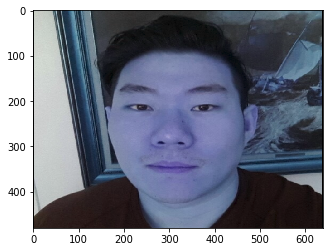

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/kyuhwan2.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 480))    # 640x480Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

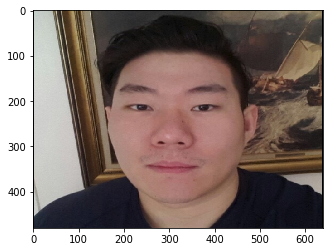

In [3]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Í∏∞
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

dlib ÏùÑ Ïù¥Ïö©Ìï¥ hog detector Î•º ÏÑ†Ïñ∏

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")

üå´üõ∏


Detector Î•º Ïù¥Ïö©Ìï¥ ÏñºÍµ¥Ïùò bounding box Î•º Ï∂îÏ∂ú

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(171, 142) (438, 409)]]


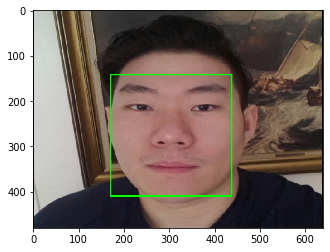

In [6]:
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


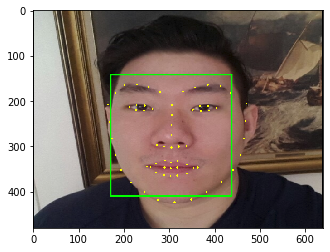

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] 
    y = landmark[8][1] - dlib_rect.width()
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(305, 275)
(x,y) : (305,155)
(w,h) : (268,268)


ÎÇ¥ ÏΩîÏùò Ï§ëÏã¨Ï†ê: (305,275)

In [11]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)
plt.show()


(268, 268, 3)


#plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Í∏∞
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker)
plt.show()

In [12]:
refined_x = x - w // 2  # left
refined_y = y #- h        # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (171,155)


In [13]:
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (171,155)


sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y: refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

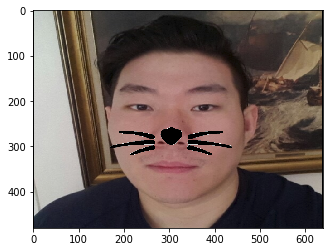

In [14]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+ img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker== 255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

Ïö∞ÏÑ† Ï†ÄÎäî ÏòÜÏúºÎ°úÎêú ÏÇ¨ÏßÑ, Î©ÄÎ¶¨ÏûàÎäîÏÇ¨ÏßÑ, Í∞ÅÎèÑÍ∞Ä Î∞ëÏóêÏÑú ÏúÑÎ°ú Ï∞çÌûåÏÇ¨ÏßÑ, Î∞ùÏùÄÏÇ¨ÏßÑ, ÌùëÎ∞±ÏÇ¨ÏßÑ Îì± ÏùÑ Ïã§ÌóòÌï¥Î≥¥ÏïòÏäµÎãàÎã§.

ÏòÜÏúºÎ°ú Îêú ÏÇ¨ÏßÑÏùÄ Ïö∞ÏÑ† Îß®ÎßàÏßÄÎßâ Îã®Í≥ÑÏóêÏÑú Ïò§Î•òÍ∞Ä ÎÇ¨ÏäµÎãàÎã§. ÏïÑÎ¨¥ÎûòÎèÑ ÏñºÍµ¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú 68Í∞úÏùò Ï†êÏù¥ Î™®Îëê ÎÇòÏò§ÏßÄ Î™ªÌïòÍ≥† Ï∞åÍ∑∏Îü¨Ï†∏ÏÑú ÏùºÎ∂Ä landmark Í∞Ä ÌëúÏãúÍ∞Ä ÎêòÏßÄ ÏïäÎäîÎã§ÎäîÍ≤ÉÏùÑ ÌôïÏù∏Ìï†Ïàò ÏûàÏóàÏäµÎãàÎã§.

Î©ÄÎ¶¨ÏûàÎäîÏÇ¨ÏßÑ(Ï†ïÎ©¥ÏÇ¨ÏßÑ) ÏùÄ Í≥†ÏñëÏù¥ ÏàòÏóºÏûêÏ≤¥ÎèÑ Î©ÄÎ¶¨ÏûàÎäî ÏÇ¨ÏßÑ ÎπÑÏú®ÎßåÌÅº Ï§ÑÏñ¥Îì§Ïñ¥ Ïûò ÏûëÎèôÏù¥ ÎêòÏóàÏäµÎãàÎã§.

Í∞ÅÎèÑÍ∞Ä Î∞ëÏóêÏÑú ÏúÑÎ°ú Ï∞çÏùÄ ÏÇ¨ÏßÑÎòêÌïú Í∞ÅÎèÑÏóê Îî∞Îùº 68Í∞úÏùò Ï†êÏù¥ Î™®Îëê ÌëúÏãúÍ∞Ä ÎêòÏßÄ ÏïäÏúºÎ©¥ Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïòÏòÄÏäµÎãàÎã§.

Î∞ùÍ∏∞Îäî ÏñºÍµ¥Ïù¥ ÏïàÎ≥¥ÏùºÏ†ïÎèÑÎ°ú Î∞ùÏùÄ ÏÇ¨ÏßÑÏù¥ ÏïÑÎãàÎ©¥ Ïûò ÏûëÎèôÌïòÏòÄÏäµÎãàÎã§. ÌùëÎ∞±ÏÇ¨ÏßÑÎòêÌïú Ïûò ÏûëÎèôÌïòÎäîÍ≤ÉÏùÑ Î≥ºÏàò ÏûàÏóáÏäµÎãàÎã§.


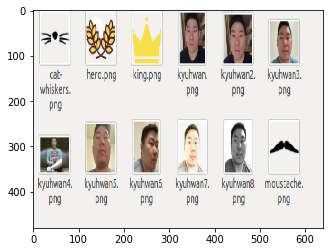

In [15]:
path = os.getenv('HOME')+'/aiffel/camera_sticker/images/submission.png'
submission = cv2.imread(path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑús
sub_img= cv2.resize(submission, (640, 480))     
sub_rgb = cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB)
plt.imshow(sub_rgb)
plt.show()